## Libraries and Epochs

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from numpy.random import default_rng
import seaborn as sn

epochs = 1000

## Read data

In [2]:
df = pd.read_csv("Tweets.csv")
df.head()

,airline_sentiment,text
0,neutral,@USAirways Is there a phone line to call into ...
1,positive,@united Bag was finally delivered and intact. ...
2,positive,@usairways Thanks to Kevin and team at F38ish ...
3,negative,"@AmericanAir Yes, talked to them. FLL says is ..."
4,negative,@VirginAmerica and it's a really big bad thing...


## Split data into positive, negative and neutral data

In [3]:
def splitter(dataset):
    positive = []
    neutral  = []
    negative = []
    for i, val in dataset.iterrows() :
        if val['airline_sentiment'] == 'positive' :
            positive.append(val['text'])
        if val['airline_sentiment'] == 'neutral' :
            neutral.append(val['text'])
        if val['airline_sentiment'] == 'negative' :
            negative.append(val['text'])
    return [positive, neutral, negative]

In [4]:
dataset = splitter(df)

In [5]:
data = []
for i,val in enumerate(dataset) :
    temp = []
    for j,val2 in enumerate(dataset[i]):
        temp2 = dataset[i][j].split()
        temp.append(temp2)
    data.append(temp)

In [6]:
# dir5 = "negative-words.txt"
# dir6 = "positive-words.txt"
# f_5= open(dir5, "r", encoding = "latin-1")
# f_6 = open(dir6, "r")
# neg_words  = f_5.read()
# pos_words = f_6.read()
# neg_words = neg_words.split()
# pos_words = pos_words.split()

## Making set of all words used in tweets

In [7]:
word_set1 = set()
for i, val in enumerate(data):
    for j , val2 in enumerate(data[i]) :
        word_set1.update(data[i][j])

In [8]:
# word_set2 = set()
# word_set2.update(pos_words)
# word_set2.update(neg_words)

In [9]:
word_set = word_set1
# for i in word_set1 :
#     if i in word_set2:
#         word_set.add(i)

In [10]:
length = len(word_set)


## Making dictionary for word to number mapping

In [11]:
i = 0
dictionary = {}
for j in word_set:
    dictionary[j] = i
    i+=1

## Transfering tweets into bag of words representation

In [12]:
def bag_of_word(data, length) :
    global dictionary
    ret = []
    for i, val in enumerate(data) :
        temp = []
        for j, val2 in enumerate(data[i]) :
            temp2 = [0]*length
            for k, val3 in enumerate(data[i][j]) :
                try:
                    index = dictionary[data[i][j][k]]
                    temp2[index]+=1
                except:
                    continue
            temp.append(temp2)
        ret.append(temp)
    return ret
    

In [13]:
bag = bag_of_word(data, length)

## Splitting data into train and test data

In [14]:
def split_(data) :
    len_pos= len(data[0])
    len_neg = len(data[2])
    len_neu = len(data[1])
    train = []
    test = []
    train.append(data[0][0:int(0.8*len_pos)])
    train.append(data[2][0:int(0.8*len_neg)])
    train.append(data[1][0:int(0.8*len_neu)])
    test.append(data[0][int(0.8*len_pos):])
    test.append(data[2][int(0.8*len_neg):])
    test.append(data[1][int(0.8*len_neu):])
    return train, test
    
    

In [15]:
train, test = split_(bag)

## Shuffling all data together

In [16]:
train_ = []
for i, val in enumerate(train) :
    temp = []
    for j, val in enumerate(train[i]):
        temp.append((i, train[i][j]))
    train_.append(temp)
train_data = train_[0]+train_[1]+train_[2]

In [17]:
test_ = []
for i, val in enumerate(test) :
    temp = []
    for j, val in enumerate(test[i]):
        temp.append((i, test[i][j]))
    test_.append(temp)
test_data = test_[0]+test_[1]+test_[2]

In [18]:
random.shuffle(train_data)
random.shuffle(test_data)

In [19]:
y, x = zip(*train_data)
y_test, x_test = zip(*test_data)

# Softmax

In [20]:
def soft_max(z):
    ret = []
    for i, val in enumerate(z) :
        e = np.exp(val)
        sum_ = np.sum(e)
        if sum_ == 0 :
            ret.append([])
        else :
            ret.append(np.true_divide(e, sum_))
    return ret

# Cross Entropy Loss

In [21]:
def cross_entropy_loss(y, y_hat) :
    loss = 0
    for i, val in enumerate(y_hat) :
        for j, _ in enumerate(y_hat[i]) :
            if j == y[i] :
                temp = 1
            else :
                temp = 0
            loss -= temp*np.log(y_hat[i][j])
    return loss
            

## Function to predict

In [22]:
def predict(x):
    global weights
    return np.dot(x, weights)
    

## Dradient descent

In [23]:
def gradient_descent(y, x, y_hat, u = 0.1):
    global weights    
    for i, val in enumerate(x) :
        temp2 = []
        for j in range(3) :
            if y[i] == j :
                temp1 = -(1-y_hat[i][j])
            else :
                temp1 = y_hat[i][j]
            temp = np.multiply(temp1, x[i])
            temp2.append(u*temp)
        weights -= np.transpose(temp2) 
    

## Training of data

In [34]:
weights = np.random.randn(length, 3)
for i in range(epochs) :
    s = 32
    rng = default_rng()
    numbers = rng.choice(len(y), size=s, replace=False)
    x_batch = []
    y_batch = []
    for j in numbers:
        x_batch.append(x[j])
        y_batch.append(y[j])
    z = predict(x_batch)
    y_hat = soft_max(z)
#     print(weights)
#    print(y_hat[0:5])
    l = cross_entropy_loss(y_batch,y_hat)
    gradient_descent(y_batch,x_batch,y_hat)
    print('loss : ', l, ' epoch : ', i)
    accuracy = 0
    for j in range(s) :
        index = np.argmax(y_hat[j])
        if index == y_batch[j] :
            accuracy +=1
    print('accuracy : ', accuracy)
    

loss :  106.1127991621835  epoch :  0
accuracy :  14
loss :  152.05712951996915  epoch :  1
accuracy :  13
loss :  114.17234873116453  epoch :  2
accuracy :  15
loss :  136.09020226845394  epoch :  3
accuracy :  11
loss :  90.70473468737268  epoch :  4
accuracy :  12
loss :  72.92334815695428  epoch :  5
accuracy :  20
loss :  88.03038439451295  epoch :  6
accuracy :  15
loss :  55.568050185183424  epoch :  7
accuracy :  17
loss :  114.59302811707623  epoch :  8
accuracy :  14
loss :  94.4181993310663  epoch :  9
accuracy :  15
loss :  98.74374114698371  epoch :  10
accuracy :  15
loss :  94.42368752273197  epoch :  11
accuracy :  14
loss :  65.25222950585388  epoch :  12
accuracy :  15
loss :  54.9798961862557  epoch :  13
accuracy :  19
loss :  77.74750653979858  epoch :  14
accuracy :  18
loss :  51.16122109647763  epoch :  15
accuracy :  22
loss :  86.13528289803959  epoch :  16
accuracy :  14
loss :  88.60434074626929  epoch :  17
accuracy :  16
loss :  55.14291436111512  epoch : 

loss :  57.40238640884267  epoch :  151
accuracy :  16
loss :  34.30513723786972  epoch :  152
accuracy :  21
loss :  45.08203685620601  epoch :  153
accuracy :  23
loss :  32.467577290300056  epoch :  154
accuracy :  28
loss :  28.99512876303662  epoch :  155
accuracy :  23
loss :  43.723768987915264  epoch :  156
accuracy :  24
loss :  55.98451008397022  epoch :  157
accuracy :  20
loss :  28.957249183033905  epoch :  158
accuracy :  26
loss :  21.35877877539903  epoch :  159
accuracy :  25
loss :  34.08020954926204  epoch :  160
accuracy :  23
loss :  31.013959484893117  epoch :  161
accuracy :  23
loss :  46.29295572289083  epoch :  162
accuracy :  22
loss :  25.79580031065777  epoch :  163
accuracy :  25
loss :  26.66001715891481  epoch :  164
accuracy :  24
loss :  33.026654884103635  epoch :  165
accuracy :  20
loss :  39.27395534409989  epoch :  166
accuracy :  20
loss :  54.7822578540192  epoch :  167
accuracy :  20
loss :  29.28518346530399  epoch :  168
accuracy :  25
loss :

loss :  29.866963010241616  epoch :  300
accuracy :  25
loss :  45.431234269123294  epoch :  301
accuracy :  19
loss :  23.01368854545529  epoch :  302
accuracy :  25
loss :  36.146139257171214  epoch :  303
accuracy :  22
loss :  29.14883216324035  epoch :  304
accuracy :  20
loss :  31.26894368609559  epoch :  305
accuracy :  21
loss :  23.485746986203903  epoch :  306
accuracy :  24
loss :  29.67731939472329  epoch :  307
accuracy :  21
loss :  42.52327338340722  epoch :  308
accuracy :  22
loss :  30.451236697317032  epoch :  309
accuracy :  25
loss :  45.089892967260674  epoch :  310
accuracy :  19
loss :  45.66306439531591  epoch :  311
accuracy :  22
loss :  33.47220610026582  epoch :  312
accuracy :  24
loss :  45.50016904436773  epoch :  313
accuracy :  16
loss :  27.313889006099753  epoch :  314
accuracy :  24
loss :  36.77209539942221  epoch :  315
accuracy :  21
loss :  33.61083059764739  epoch :  316
accuracy :  24
loss :  30.812214744387365  epoch :  317
accuracy :  24
lo

loss :  14.07481575142697  epoch :  448
accuracy :  29
loss :  27.85242618391455  epoch :  449
accuracy :  26
loss :  37.21101164085121  epoch :  450
accuracy :  19
loss :  24.371456318848498  epoch :  451
accuracy :  22
loss :  19.757026599221486  epoch :  452
accuracy :  27
loss :  18.14238039778009  epoch :  453
accuracy :  27
loss :  31.338059952367  epoch :  454
accuracy :  24
loss :  28.707554866899315  epoch :  455
accuracy :  23
loss :  12.490337459241527  epoch :  456
accuracy :  25
loss :  29.382469204933685  epoch :  457
accuracy :  22
loss :  17.86822824983684  epoch :  458
accuracy :  27
loss :  37.945432561595396  epoch :  459
accuracy :  23
loss :  29.98465505917714  epoch :  460
accuracy :  22
loss :  40.015155611237596  epoch :  461
accuracy :  22
loss :  32.97340232593916  epoch :  462
accuracy :  24
loss :  35.49800535369015  epoch :  463
accuracy :  24
loss :  19.988918275780957  epoch :  464
accuracy :  26
loss :  15.012853788494732  epoch :  465
accuracy :  26
los

loss :  28.279707438125335  epoch :  596
accuracy :  25
loss :  26.252266095374146  epoch :  597
accuracy :  22
loss :  10.04013672429648  epoch :  598
accuracy :  27
loss :  25.844097855842147  epoch :  599
accuracy :  25
loss :  24.266731694165003  epoch :  600
accuracy :  23
loss :  13.984438762440538  epoch :  601
accuracy :  27
loss :  11.438943687526093  epoch :  602
accuracy :  29
loss :  19.48292656093758  epoch :  603
accuracy :  28
loss :  12.848028330103386  epoch :  604
accuracy :  28
loss :  18.825220951996766  epoch :  605
accuracy :  23
loss :  16.21500398571049  epoch :  606
accuracy :  26
loss :  22.864569334327374  epoch :  607
accuracy :  24
loss :  23.791589497320896  epoch :  608
accuracy :  23
loss :  21.591043690660733  epoch :  609
accuracy :  24
loss :  23.253411155955234  epoch :  610
accuracy :  25
loss :  27.205353624216688  epoch :  611
accuracy :  28
loss :  21.08591694899746  epoch :  612
accuracy :  27
loss :  12.562747564233806  epoch :  613
accuracy : 

loss :  29.438071076118508  epoch :  744
accuracy :  24
loss :  18.67831547714728  epoch :  745
accuracy :  24
loss :  20.54169239366861  epoch :  746
accuracy :  24
loss :  20.73964988271707  epoch :  747
accuracy :  26
loss :  19.604997748958166  epoch :  748
accuracy :  27
loss :  15.978317479812748  epoch :  749
accuracy :  26
loss :  4.922224681658809  epoch :  750
accuracy :  31
loss :  11.647624828479753  epoch :  751
accuracy :  28
loss :  38.82635573348405  epoch :  752
accuracy :  22
loss :  14.946907483856023  epoch :  753
accuracy :  27
loss :  20.371810808299095  epoch :  754
accuracy :  25
loss :  3.53758305195316  epoch :  755
accuracy :  30
loss :  26.03100597022746  epoch :  756
accuracy :  24
loss :  11.512013130246325  epoch :  757
accuracy :  28
loss :  22.386022379252058  epoch :  758
accuracy :  23
loss :  6.683840111579189  epoch :  759
accuracy :  30
loss :  10.17398688978577  epoch :  760
accuracy :  27
loss :  35.852133338591706  epoch :  761
accuracy :  25
lo

loss :  15.458795092020331  epoch :  892
accuracy :  27
loss :  28.882186433775615  epoch :  893
accuracy :  23
loss :  11.844323945019376  epoch :  894
accuracy :  26
loss :  20.400640041138768  epoch :  895
accuracy :  25
loss :  37.35011069819062  epoch :  896
accuracy :  21
loss :  20.158712541397282  epoch :  897
accuracy :  23
loss :  6.948308334140813  epoch :  898
accuracy :  29
loss :  15.288383717809774  epoch :  899
accuracy :  26
loss :  11.868139785610941  epoch :  900
accuracy :  27
loss :  16.16889920482632  epoch :  901
accuracy :  26
loss :  20.704996956092824  epoch :  902
accuracy :  24
loss :  27.519533460162215  epoch :  903
accuracy :  23
loss :  22.778656801620933  epoch :  904
accuracy :  23
loss :  16.757835910276214  epoch :  905
accuracy :  29
loss :  17.784953656670808  epoch :  906
accuracy :  27
loss :  8.659656470845082  epoch :  907
accuracy :  29
loss :  15.993255591051888  epoch :  908
accuracy :  26
loss :  25.0745018778042  epoch :  909
accuracy :  2

## Test Data Prediction

In [35]:
z = predict(x_test)
y_hat = soft_max(z)
l = cross_entropy_loss(y_test,y_hat)
print('loss : ', l)
accuracy = 0
for j, val in enumerate(y_test) :
    index = np.argmax(y_hat[j])
    if index == y_test[j] :
        accuracy +=1
print('accuracy : ', accuracy, ' out of : ', len(y_test) )

loss :  3179.1093022628875
accuracy :  2077  out of :  2929


## Evaluation

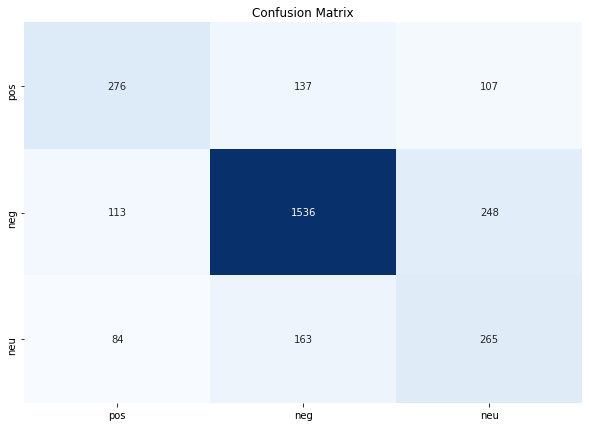

In [61]:
confusion = [[0]*3 for _ in range(3) ]
for j,val in enumerate(y_hat) :
    index = np.argmax(y_hat[j])
    if index == 0 :
        if y_test[j] == 0 :
            confusion[0][0]+=1
        if y_test[j] == 1 :
            confusion[0][1] +=1
        if y_test[j] == 2:
            confusion[0][2] +=1
    if index == 1 :
        if y_test[j] == 0 :
            confusion[1][0]+=1
        if y_test[j] == 1 :
            confusion[1][1] +=1
        if y_test[j] == 2:
            confusion[1][2] +=1
    if index == 2 :
        if y_test[j] == 0 :
            confusion[2][0]+=1
        if y_test[j] == 1 :
            confusion[2][1] +=1
        if y_test[j] == 2:
            confusion[2][2] +=1
df_cm = pd.DataFrame(confusion, index = [i for i in ['pos', 'neg', 'neu']],columns = [i for i in ['pos', 'neg', 'neu']])
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True, fmt='g', cbar = False, cmap = 'Blues')     
plt.show()

In [79]:
TP1 = confusion[0][0]
TP2 = confusion[1][1]
TP3 = confusion[2][2]
TN1 = confusion[1][1] + confusion[1][2] + confusion[2][1] + confusion[2][2]
TN2 = confusion[0][0] + confusion[0][2] + confusion[2][0] + confusion[2][2]
TN3 = confusion[0][0] + confusion[0][1] + confusion[1][0] + confusion[1][1]
FP1 = confusion[0][1] + confusion[0][2]
FP2 = confusion[1][0] + confusion[1][2]
FP3 = confusion[2][0] + confusion[2][1]
FN1 = confusion[1][0] + confusion[2][0]
FN2 = confusion[0][1] + confusion[2][1]
FN3 = confusion[0][2] + confusion[1][2]

In [80]:
P1 = TP1/float(TP1+FP1)
P2 = TP2/float(TP2+FP2)
P3 = TP3/float(TP3+FP3)
R1 = TP1/float(TP1+FN1)
R2 = TP2/float(TP2+FN2)
R3 = TP3/float(TP3+FN3)
# A1 = (TP1+TN1)/float(len(y_test))
# A2 = (TP2+TN2)/float(len(y_test))
# A3 = (TP3+TN3)/float(len(y_test))
# F1 = 2*(P1*R1)/float(P1+R1)
# F2 = 2*(P2*R2)/float(P2+R2)
# F3 = 2*(P3*R3)/float(P3+R3)

# Micro-Average 

In [81]:
Precision = (TP1+TP2+TP3)/float(TP1+TP2+TP3+FP1+FP2+FP3)
Recall = (TP1+TP2+TP3)/float(TP1+TP2+TP3+FN1+FN2+FN3)
F1_score = 2*(Precision*Recall)/float(Precision+Recall)

print(' Micro-Average Precison is : ', Precision)
print(' Micro-average Recall is : ', Recall)
print(' Micro-average F1-score is : ', F1_score)

 Micro-Average Precison is :  0.7091157391601229
 Micro-average Recall is :  0.7091157391601229
 Micro-average F1-score is :  0.7091157391601229


# Macro-Average

In [83]:
Precision_ = (P1+P2+P3)/3
Recall_ = (R1+R2+R3)/3
F1_score_ = 2*(Precision_*Recall_)/float(Precision_+Recall_)

print(' Macro-Average Precison is : ', Precision_)
print(' Macro-average Recall is : ', Recall_)
print(' Macro-average F1-score is : ', F1_score_)

 Macro-Average Precison is :  0.619348960445305
 Macro-average Recall is :  0.6158433919234414
 Macro-average F1-score is :  0.6175912016512012


# Accuracy

In [84]:
print('Accuracy is : ',accuracy/len(y_test))

Accuracy is :  0.7091157391601229
